In [1]:
import tensorflow as tf
from tensorflow import keras
import  matplotlib.pyplot as plt
import numpy as np


In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

# CIFAR-10 Keras Dataset

In [4]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

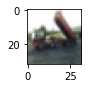

In [7]:
plot_sample(2)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
classes[y_train[3][0]]

'deer'

In [10]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [11]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
y_train_cate = keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')
y_test_cate = keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')

y_train_cate[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [13]:
def get_model(): 
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000,activation='relu'),
        keras.layers.Dense(1000,activation='relu'),
        keras.layers.Dense(10,activation='sigmoid')
    ])
    tb_callbak = tf.keras.callbacks.TensorBoard(log_dir="logs/ICANN",histogram_freq=1)
    model.compile(optimizer='SGD',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    return model,tb_callbak

In [21]:
model_get,callback= get_model()
model_get.fit(X_train_scaled,y_train_cate,epochs=5,callbacks=[callback])

Epoch 1/5
1563/1563 [==============================] - 15s 9ms/step - loss: 1.8110 - accuracy: 0.3552
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6243 - accuracy: 0.4278
Epoch 3/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.5410 - accuracy: 0.4596
Epoch 4/5
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4830 - accuracy: 0.4772
Epoch 5/5
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4320 - accuracy: 0.4965


In [14]:
# %%timeit -n1 -r1
# with tf.device('/GPU:0'):
#     model_get,callback= get_model()
#     model_get.fit(X_train_scaled,y_train_cate,epochs=1,callbacks=[callback])

1563/1563 [==============================] - 15s 7ms/step - loss: 1.8143 - accuracy: 0.3529
25.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [15]:
# %%timeit -n1 -r1
# with tf.device('/CPU:0'):
#     model_get= get_model()
#     model_get.fit(X_train_scaled,y_train_cate,epochs=1)

In [22]:
model_get.evaluate(X_test_scaled,y_test_cate)

313/313 [==============================] - 1s 4ms/step - loss: 1.4645 - accuracy: 0.4714


[1.4645366668701172, 0.4713999927043915]

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model_get.predict(X_test)
y_pred_classes = [np.argmax(ele) for ele in y_pred]
print(classification_report(y_test,y_pred_classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.15      0.98      0.25      1000
           1       0.25      0.19      0.22      1000
           2       0.14      0.24      0.18      1000
           3       0.22      0.18      0.20      1000
           4       0.12      0.01      0.01      1000
           5       0.12      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.44      0.00      0.01      1000
           8       1.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.16     10000
   macro avg       0.25      0.16      0.09     10000
weighted avg       0.25      0.16      0.09     10000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
